## A FUNÇÃO DE HIMMELBLAU

## Introdução

**CONHECENDO A FUNÇÃO DE HIMMELBLAU**

<div style=' text-align: justify; text-justify: inter-word;'>
A presente atividade tem como objetivo a resolução do problema de otimização da função Himmelblau por meio do uso de algoritmos genéticos. A função Himmelblau é conhecida por possuir múltiplos pontos de mínimo local, o que torna o desafio de encontrar o mínimo global ainda mais complexo. O foco principal é encontrar a coordenada (𝑥,𝑦) que corresponde ao ponto de mínimo global dessa função.
$$
f(x,y) = (x^2 +y -11)^2 + (x + y^2 - 7)^2,
$$</div>

**Observação:**

<justify>Máximos e mínimos globais de uma função podem ser calculados com diferentes recursos, como gradiente e funções matemáticas mais simples.</justify>

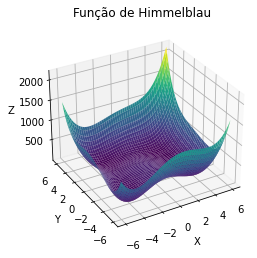

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

# Cria a figura e o eixo 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plota o gráfico 3D
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Função de Himmelblau')
ax.view_init(elev=30, azim=-120)
plt.show()


## Importações

Todos os comandos de import devem estar dentro desta seção.

In [4]:
import math
import numpy as np
from funcoes import Himmelblau as him
from funcoes import funcao_objetivo_himmelblau as foh
from funcoes import gene_him as gene
from funcoes import individuo_him
from funcoes import populacao_him
from funcoes import selecao_torneio_min_him as selecao
from funcoes import funcao_mutacao_him as mutacao
from funcoes import cruzamento_him as funcao_cruzamento
import random

<hr>

In [5]:
TAMANHO_POP = 100
NUMERO_VARIAVEIS = 2
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05

<hr>

### Discussão:

No caso do problema de Himmelblau, que envolve uma função não linear com múltiplos mínimos e máximos locais, a utilização de algoritmos genéticos pode ser uma abordagem promissora. Os algoritmos genéticos têm a capacidade de explorar o espaço de busca de forma ampla e simultaneamente, permitindo que diferentes soluções sejam avaliadas e combinadas.

No entanto, é importante considerar que a eficácia dos algoritmos genéticos depende de diversos fatores, como o tamanho da população, a taxa de cruzamento e mutação, os operadores genéticos utilizados e a configuração dos parâmetros. Além disso, a convergência para o mínimo global não é garantida, especialmente em problemas complexos.

#### O que eu vou fazer/Resolver:
<div style=' text-align: justify; text-justify: inter-word;'> 
    
    
**Representação dos indivíduos:** Neste caso, cada indivíduo pode ser representado por um par de coordenadas (𝑥,𝑦) que correspondem a um ponto no espaço de busca.

**Criação da população inicial:** Gere uma população inicial de indivíduos de forma aleatória ou utilizando alguma estratégia específica, o qual ainda não sei ao certo.

**Avaliação dos indivíduos:** Calcular função Himmelblau para cada indivíduo da população.

**Seleção dos pais:** Usarei provavelmente o método da roleta, ou um outro o qual estou vendo que o "roleta viciada", em que indivíduos com melhor desempenho têm maior probabilidade de serem selecionados.

**Cruzamento:** Assim vou gerar novos indivíduos que combinam características das soluções existentes.

**Mutação:** Pra mim não faz sentido, mas pode ter algo relevante.

**Atualização da população:** Pra subtituir a população atual pela nova população gerada após o cruzamento e a mutação.

**Critério de parada:** Acho que faz snetido colocar o clitério de parada como número de gerações.

**Retorno da melhor solução:** Quando atingir o critério de parada, ele irá retornar a melhor solução encontrada, ou seja, a coordenada (𝑥,𝑦) que corresponde ao ponto de mínimo global da função Himmelblau.


## Códigos e discussão

In [6]:
def funcao_objetivo(populacao):
    fitnesss = []
    for i in populacao:
        individuo = foh(i)
        fitnesss.append(individuo)
    return fitnesss

In [7]:
populacao = populacao_him(
    TAMANHO_POP, NUMERO_VARIAVEIS
)  # Estamos criando a população com os parâmetros que são necessários.
# print(populacao)
melhor_fitness_ja_visto = float(
    "inf"
)  # Estamos definindo que o melhor fitness já visto é maior que qualquer fitness da população. Isso é necessário para que o código possa rodar corretamente.
# print("Progresso do melhor candidato para o mínimo global da função:")

for n in range(NUM_GERACOES):
    # Seleção
    fitness = funcao_objetivo(
        populacao
    )  # Cria-se uma lista com o fitness de cada indivíduo

    # print(par_populacao_fitness)

    populacao = selecao(
        populacao, fitness
    )  # Juntamos ambas as listas, e comparamos de 3 em 3 todos os indivíduos para definir os melhores

    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]

    contador = 0

    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:  # Aleatorizando as chances...
            filho1, filho2 = funcao_cruzamento(
                pai, mae
            )  # Estamos cruzando os indivíduos como no problema das caixas binárias, cruzamento de ponto simples.
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        contador = contador + 2
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:  # Aleatorizando as chances...
            individuo = populacao[n]
            populacao[n] = mutacao(
                individuo
            )  # Aplicando a mutação nos indivíduos fortunos (ou infortunos)
    # melhor individuo já visto até agora
    fitness = funcao_objetivo(populacao)
    menor_fitness = min(fitness)
    if menor_fitness < melhor_fitness_ja_visto:
        posicao = fitness.index(menor_fitness)
        melhor_individuo_ja_visto = populacao[posicao].copy()
        melhor_fitness_ja_visto = menor_fitness
        # print(melhor_individuo_ja_visto)
        print((melhor_individuo_ja_visto), "- fitness:", melhor_fitness_ja_visto)
# Retornando o melhor indivíduo encontrado:
print()
print(
    "Melhor palpite de valores de x e y (respectivamente) para o mínimo global encontrado:"
)
print(melhor_individuo_ja_visto)


[2.9582641263203557, 2.327843124339628] - fitness: 1.9027211156722639
[3.0354549562489908, 1.875610753534862] - fitness: 0.2075054918544733
[3.053558505612707, 2.0203730870415884] - fitness: 0.13709509809425935
[3.052876634731451, 2.0203730870415884] - fitness: 0.13405852991262934
[3.052876634731451, 1.924985576419791] - fitness: 0.11839353472660094
[3.0360819215734325, 1.924985576419791] - fitness: 0.0871298497341094
[3.0360819215734325, 1.9454668066048741] - fitness: 0.0587224721050398
[3.015736757223194, 1.9454668066048741] - fitness: 0.041380010645594996
[3.015736757223194, 1.9816418391610913] - fitness: 0.00911325966426172
[3.0071288709653143, 1.9816418391610913] - fitness: 0.004950191713642765
[3.0071288709653143, 1.9879161346265706] - fitness: 0.002630929209767866
[3.0071288709653143, 1.9926427869611008] - fitness: 0.0017527742405569714
[2.9968718100067884, 1.9926427869611008] - fitness: 0.0017385144843135058
[3.000311861997921, 1.9926427869611008] - fitness: 0.00087474550217318

> <hr>

## Conclusão

Gostei muito da minha resolução desse problema, que evidenciou algumas considerações importantes. O problema em questão é simples, tratando-se de um problema de caixas binárias, e é recomendado reaproveitar códigos já desenvolvidos e dividir o problema em diferentes algoritmos. A função de Himmelblau, utilizada como modelo para testar algoritmos genéticos em busca do mínimo global com duas variáveis, mostrou-se muito útil. Embora não tenham sido contemplados valores negativos, isso não representa um obstáculo, pois há um resultado correspondente em cada quadrante do plano cartesiano. No nosso caso, encontramos o ponto adequado (3,2). Se desejado, é possível introduzir valores negativos ao adicionar uma condição durante a geração dos valores, proporcionando 50% de chance de o número float gerado ser negativo ou positivo. Essa modificação é relativamente simples de implementar, o que torna os algoritmos genéticos ainda mais versáteis e eficientes.

<hr>

## Referências

[1] INDUSMIC. **Himmelblau Function**. Disponível em: <https://www.indusmic.com/post/himmelblau-function>. 
<br>[2] Mathematics. **Separable and non-separable functions**. Diponível em: <https://math.stackexchange.com/questions/1186673/separable-and-non-separable-function>. 
<br>[3] Learning Monkey. **Convex Non-Convex Functions and Contour for Neural Network**. Disponível em: <https://www.youtube.com/watch?v=qyqZ3VlkzvI>. 
<br>[4] WIKIPEDIA. **Himmelblau's function**. Disponível em: <https://en.wikipedia.org/wiki/Himmelblau%27s_function>. 
<br>[5] Imagem 01. Disponível em: <https://static.wixstatic.com/media/40af5e_2bff1fbea4d74421ab26296ae44593d0~mv2.png/v1/fill/w_440,h_452,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/40af5e_2bff1fbea4d74421ab26296ae44593d0~mv2.png>.


## Playground